In [1]:
!pip install datasets

In [2]:
!pip install -q torchtext==0.17.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 105.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import pandas as pd
from datasets import load_dataset

import time
import re
import string

In [4]:
# load dataset
ds = load_dataset('thainq107/ntc-scv')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
ds

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'preprocessed_sentence'],
        num_rows: 30000
    })
    valid: Dataset({
        features: ['sentence', 'label', 'preprocessed_sentence'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['sentence', 'label', 'preprocessed_sentence'],
        num_rows: 10000
    })
})

In [6]:
train_df = pd.DataFrame(ds['train'][:])
valid_df = pd.DataFrame(ds['valid'][:])
test_df = pd.DataFrame(ds['test'][:])

In [7]:
train_df.head()

,sentence,label,preprocessed_sentence
0,"Cửa_hàng nhỏ xinh trên mặt_đường , vị_trí khá ...",1,cửa hàng nhỏ xinh trên mặt đường vị trí khá dễ...
1,Mình mới check in quán này hôm_nay . Quán năm ...,1,mình mới check in quán này hôm nay quán năm bê...
2,Quán không khó tìm như mình nghĩ . Bước chân v...,1,quán không khó tìm như mình nghĩ bước chân vào...
3,Mình tới wan ' mua mang về vô_tình thấy nhân_v...,1,mình tới wan mua mang về vô tình thấy nhân viê...
4,Mi ̀ nh đi qua ́ n na ̀ y cu ̃ ng 3-4 lâ ̀ n r...,1,mi ̀ nh đi qua ́ n na ̀ y cu ̃ ng lâ ̀ n rô ̀ ...


In [8]:
def processing_text(text):
    # remove URLs
    url_pattern = re.compile(r'https?://\s+\wwww\.\s+')
    text = url_pattern.sub(r' ', text)

    # remove HTML tags
    html_pattern = re.compile(r'<[^<>]+>')
    text = html_pattern.sub(r' ', text)

    # remove punctuations and digits
    replace_chars = list(string.punctuation + string.digits)
    for char in replace_chars:
        if char in text:
            text = text.replace(char, ' ')

    # remove emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F" # emoticons
        u"\U0001F300-\U0001F5FF" # symbols & pictographs
        u"\U0001F680-\U0001F6FF" # transport & map symbols
        u"\U0001F1E0-\U0001F1FF" # flags (iOS)
        u"\U0001F1F2-\U0001F1F4" # Macau flag
        u"\U0001F1E6-\U0001F1FF" # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r' ', text)

    # normalize whitespace
    text = ' '.join(text.split())

    # lowercase
    text = text.lower()

    return text

In [9]:
train_df['sentence'] = train_df['sentence'].apply(lambda x: processing_text(x))
valid_df['sentence'] = valid_df['sentence'].apply(lambda x: processing_text(x))
test_df['sentence'] = test_df['sentence'].apply(lambda x: processing_text(x))

In [10]:
train_df.head()

,sentence,label,preprocessed_sentence
0,cửa hàng nhỏ xinh trên mặt đường vị trí khá dễ...,1,cửa hàng nhỏ xinh trên mặt đường vị trí khá dễ...
1,mình mới check in quán này hôm nay quán năm bê...,1,mình mới check in quán này hôm nay quán năm bê...
2,quán không khó tìm như mình nghĩ bước chân vào...,1,quán không khó tìm như mình nghĩ bước chân vào...
3,mình tới wan mua mang về vô tình thấy nhân viê...,1,mình tới wan mua mang về vô tình thấy nhân viê...
4,mi ̀ nh đi qua ́ n na ̀ y cu ̃ ng lâ ̀ n rô ̀ ...,1,mi ̀ nh đi qua ́ n na ̀ y cu ̃ ng lâ ̀ n rô ̀ ...


In [11]:
# word-based tokenizer
from torchtext.data import get_tokenizer
tokenizer = get_tokenizer('basic_english')

# build vocab
from torchtext.vocab import build_vocab_from_iterator

def yield_tokens(sentences, tokenizer):
    for sentence in sentences:
        yield tokenizer(sentence)

vocab_size = 10000
vocab = build_vocab_from_iterator(
    yield_tokens(train_df['sentence'], tokenizer),
    max_tokens=vocab_size,
    specials=['<pad>', '<unk>']
)
vocab.set_default_index(vocab['<unk>'])
vocab


Vocab()

In [12]:
# convert torchtext dataset
from torchtext.data.functional import to_map_style_dataset

def prepare_dataset(df):
    for sentence, label in zip(df['sentence'], df['label']):
        encode_sentence = vocab(tokenizer(sentence))
        yield encode_sentence, label

train_dataset = prepare_dataset(train_df)
train_dataset = to_map_style_dataset(train_dataset)

valid_dataset = prepare_dataset(valid_df)
valid_dataset = to_map_style_dataset(valid_dataset)

test_dataset = prepare_dataset(test_df)
test_dataset = to_map_style_dataset(test_dataset)

In [13]:
seq_length = 100

def collate_fn(batch):
    sentences, labels = list(zip(*batch))
    encoded_sentences = [
        sentence+([0] * (seq_length - len(sentence))) if len(sentence) < seq_length else sentence[:seq_length]
        for sentence in sentences
    ]

    encoded_sentences = torch.tensor(encoded_sentences, dtype=torch.int64)
    labels = torch.tensor(labels)
    return encoded_sentences, labels

batch_size = 128

train_dataloader = DataLoader(
    train_dataset,
    batch_size=128,
    shuffle=True,
    num_workers=0,
    collate_fn=collate_fn
)
valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=128,
    shuffle=False,
    num_workers=0,
    collate_fn=collate_fn
)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=128,
    shuffle=False,
    num_workers=0,
    collate_fn=collate_fn
)

In [14]:
from transformer_base.transformer_encoder import TransformerEncoder

class TransformerCls(nn.Module):
    def __init__(self, vocab_size, embed_dim, max_length, num_layers, num_heads,
                 ff_dim, dropout=0.1, device='cpu'):
        super(TransformerCls, self).__init__()
        self.transformer_encoder = TransformerEncoder(
            vocab_size=vocab_size,
            embed_dim=embed_dim,
            max_length=max_length,
            num_layers=num_layers,
            num_heads=num_heads,
            ff_dim=ff_dim,
            dropout=dropout,
            device=device
        )
        self.avg_pool = nn.AvgPool1d(kernel_size=max_length)
        self.fc1 = nn.Linear(embed_dim, 20)
        self.fc2 = nn.Linear(20, 2)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()

    def forward(self, x):
        output = self.transformer_encoder(x) # output: torch.Size([128, 100, 200]) (batch_size, seq_length, embedding_dim)
        output = self.avg_pool(torch.permute(output, (0, 2, 1))).squeeze() # output: torch.Size([128, 100, 2])
        output = self.dropout(output)
        output = self.fc1(output)
        output = self.dropout(output)
        output = self.fc2(output)
        return output

In [15]:
vocab_size = 10000
max_length = 100
embed_dim = 200
num_layers = 2
num_heads = 4
ff_dim = 128
dropout = 0.1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = TransformerCls(
    vocab_size=vocab_size,
    embed_dim=embed_dim,
    max_length=max_length,
    num_layers=num_layers,
    num_heads=num_heads,
    ff_dim=ff_dim,
    dropout=dropout,
    device=device
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)
num_epochs = 50
save_model = '.'
# os.makedirs(save_model, exist_ok = True)
model_name = 'model'

from utils.train import train
model, metrics = train(
    model, model_name, save_model, optimizer, criterion,
    train_dataloader, valid_dataloader, num_epochs, device
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

| epoch   1 |    50/  235 batches | accuracy    0.522
| epoch   1 |   100/  235 batches | accuracy    0.606
| epoch   1 |   150/  235 batches | accuracy    0.660
| epoch   1 |   200/  235 batches | accuracy    0.687
-----------------------------------------------------------
| End of epoch   1 | Time:  8.07s | Train Accuracy    0.734 | Train Loss    0.645 | Valid Accuracy    0.747 | Valid Loss    0.542 
-----------------------------------------------------------
| epoch   2 |    50/  235 batches | accuracy    0.763
| epoch   2 |   100/  235 batches | accuracy    0.777
| epoch   2 |   150/  235 batches | accuracy    0.791
| epoch   2 |   200/  235 batches | accuracy    0.798
-----------------------------------------------------------
| End of epoch   2 | Time:  7.03s | Train Accuracy    0.802 | Train Loss    0.471 | Valid Accuracy    0.800 | Valid Loss    0.442 
-----------------------------------------------------------
| epoch   3 |    50/  235 batches | accuracy    0.811
| epoch   3 

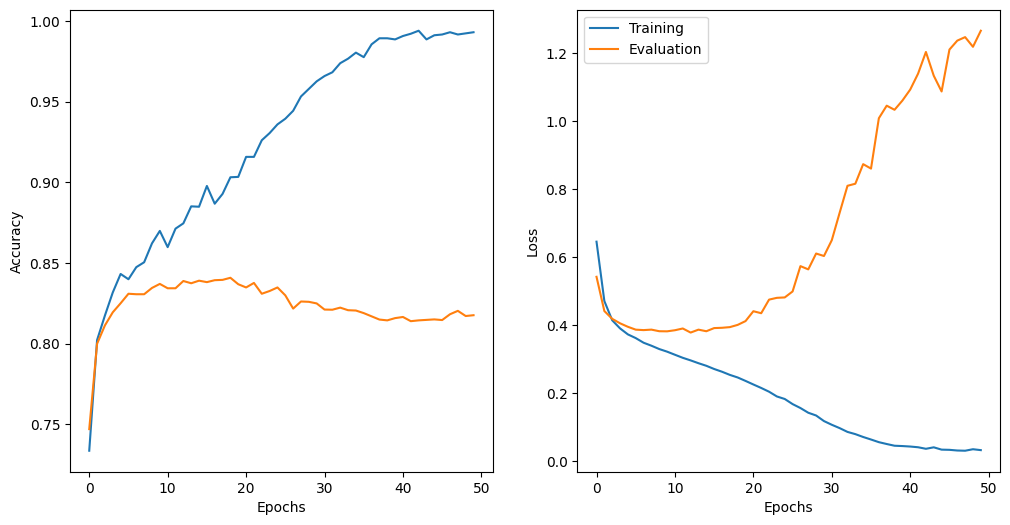

In [16]:
from utils.plot_result import plot_result

plot_result(
    num_epochs,
    metrics["train_accuracy"],
    metrics["valid_accuracy"],
    metrics["train_loss"],
    metrics["valid_loss"]
)

### Using BERT

##### Load Dataset

In [1]:
# install libs
!pip install -q -U transformers datasets accelerate evaluate

In [2]:
from datasets import load_dataset

ds = load_dataset('thainq107/ntc-scv')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


##### Preprocessing

In [3]:
# tokenizations
from transformers import AutoTokenizer

model_name = 'distilbert-base-uncased' # bert-base-uncased

tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    usee_fast=True
)
max_seq_length = 100
max_seq_length = min(max_seq_length, tokenizer.model_max_length)

def preprocess_function(examples):
    # tokenize the texts
    result = tokenizer(
        examples['preprocessed_sentence'],
        padding='max_length',
        max_length=max_seq_length,
        truncation=True
    )
    result['label'] = examples['label']
    return result

# running the preprocessing pipeline on all the datasets
processed_dataset = ds.map(
    preprocess_function,
    batched=True,
    desc='Running tokenizer on dataset'
)

##### Modeling

In [4]:
from transformers import AutoConfig, AutoModelForSequenceClassification

num_labels = 2

config = AutoConfig.from_pretrained(
    model_name,
    num_labels=num_labels,
    finetuning_tasks='text-classification'
)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    config=config
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##### Metric

In [5]:
import numpy as np
import evaluate

metric = evaluate.load('accuracy')
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    result = metric.compute(predictions=predictions, references=labels)
    return result

##### Trainer

In [6]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='.',
    learning_rate=2e-5,
    per_device_train_batch_size=128,
    per_device_eval_batch_size=128,
    num_train_epochs=10,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset['train'],
    eval_dataset=processed_dataset['valid'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

<ipython-input-6-41ab22380077>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [7]:
import wandb
wandb.init(mode='disabled')

In [8]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.458363,0.794500
2,No log,0.413711,0.817200
3,0.462800,0.407021,0.821000
4,0.462800,0.382402,0.835600
5,0.345300,0.402019,0.837900
6,0.345300,0.395242,0.837900
7,0.280400,0.394933,0.840300
8,0.280400,0.413662,0.840600
9,0.238200,0.424799,0.844100
10,0.238200,0.436603,0.842900


TrainOutput(global_step=2350, training_loss=0.31337795501059673, metrics={'train_runtime': 2782.3699, 'train_samples_per_second': 107.822, 'train_steps_per_second': 0.845, 'total_flos': 7761761640000000.0, 'train_loss': 0.31337795501059673, 'epoch': 10.0})